# Final Project on the Hubble Ultra Deep Field (UDF f105w image)

In [45]:
import numpy as np
import sep

In [46]:
# additional setup for reading the test image and displaying plots
from astropy.io import fits
import astropy.io.fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

Read an UDF image from a FITS file and display it

In [47]:
# read image into standard 2-d numpy array
data = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits", ext=0)

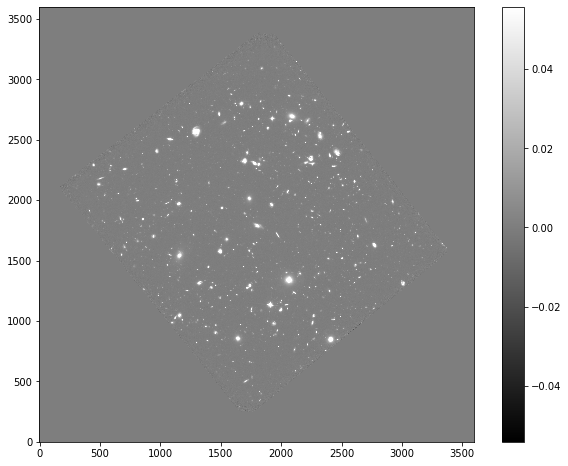

In [48]:
# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('f105wfit.png')

### Background Subtraction

In [49]:
# measure a spatially varying background on the image
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

In [50]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)
#print(data.globalback)
#print(data.globalrms)

0.0
0.0005398219218477607


In [51]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()

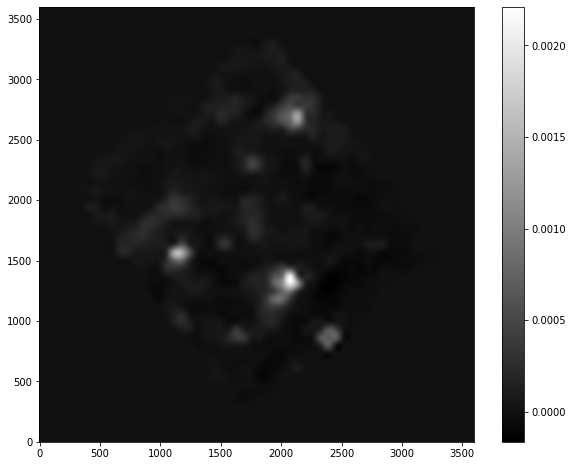

In [52]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('f105wbkground.png')

In [53]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

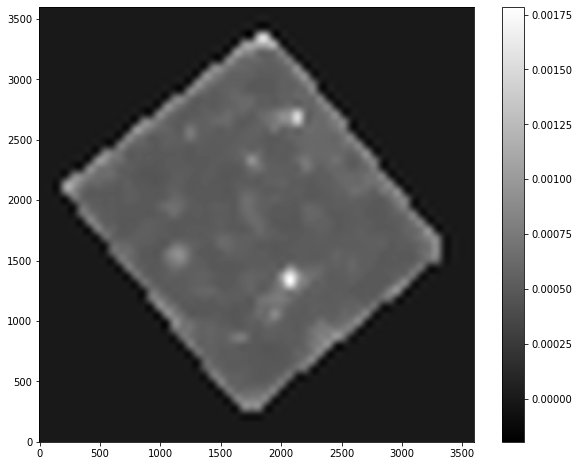

In [54]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('f105wbkgrnoise.png')

In [55]:
# subtract the background
data_sub = data - bkg

### Object Detection

Setting the detection threshold to be a constant value of 4σ where σ is the global background RMS.

In [88]:
objects = sep.extract(data_sub, 4, err=bkg.globalrms)

#### Sources detected

In [89]:
# how many objects were detected
len(objects)

3237

To check where the detected objects are, over-plot the object coordinates with some basic shape parameters on the image

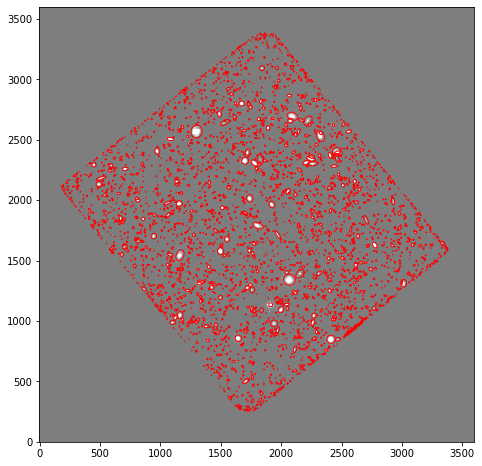

In [90]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('f105wobjdetect.png')

### Aperture photometry

Perform simple circular aperture photometry with a 3 pixel radius at the locations of the objects

In [91]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [92]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.029188 +/- 0.170868
object 1: flux = 0.032885 +/- 0.181365
object 2: flux = 0.082070 +/- 0.286494
object 3: flux = 0.064379 +/- 0.253747
object 4: flux = 0.070986 +/- 0.266448
object 5: flux = 0.039688 +/- 0.199240
object 6: flux = 0.104682 +/- 0.323559
object 7: flux = 0.045617 +/- 0.213601
object 8: flux = 0.046993 +/- 0.216797
object 9: flux = 0.063440 +/- 0.251890


#### Step 6 Histogram the Fluxes

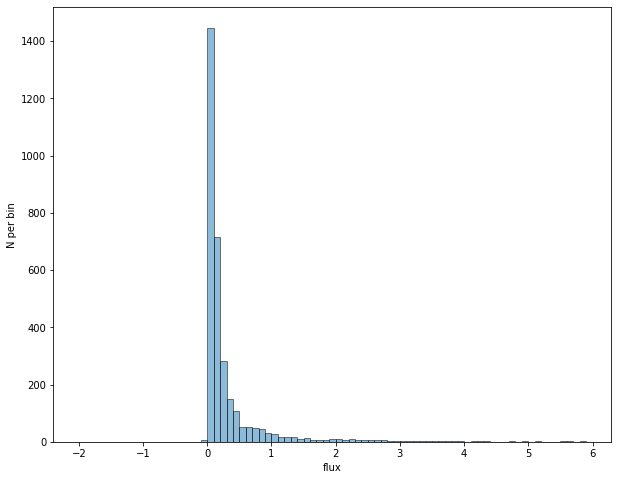

In [98]:
n = len(flux)  #number of points

width = 0.1
histmin = np.floor(min(flux))
#histmax = np.ceil(max(flux)) + width
histmax = 6
bins = np.arange(histmin,histmax,width)
plt.hist(flux, bins=bins, alpha=0.5, edgecolor="black")
plt.ylabel("N per bin")
plt.xlabel("flux")
plt.savefig('f105whisto.png')

In [ ]:
for i in flux:
    print(i)

#### Step 7 Mean, median, and standard deviation of the distribution of fluxes

In [96]:
print(f"Mean: {np.mean(flux)}")
print(f"Median: {np.median(flux)}")
print(f"Standard Deviation: {np.std(flux)}")

Mean: 0.9382356456101065
Median: 0.1120787098351866
Standard Deviation: 15.081402921667813


In [112]:
print(f"The largest outlier is: {max(flux)}")

The largest outlier is: 806.9677629280089


#### Where the outlier is

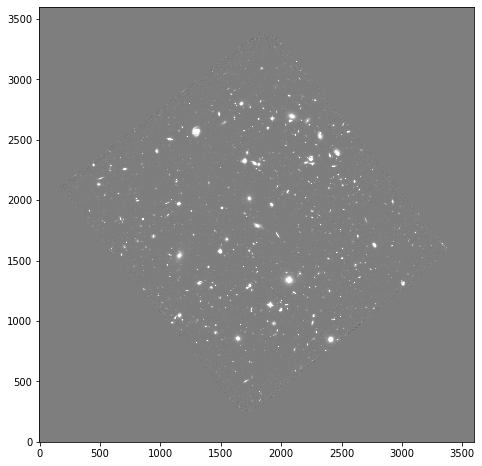

In [104]:
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    if (i == max(flux)):
        e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('f105woutlier.png')

In [ ]:
for i in objects:
    print(i)